[[ 2. 10.]
 [ 2.  5.]
 [ 8.  4.]
 [ 5.  8.]
 [ 7.  5.]
 [ 6.  4.]
 [ 1.  2.]
 [ 4.  9.]]


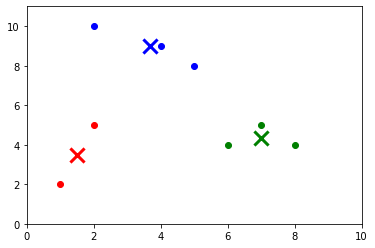

[[array([2., 5.], dtype=float32), array([1., 2.], dtype=float32)], [array([8., 4.], dtype=float32), array([7., 5.], dtype=float32), array([6., 4.], dtype=float32)], [array([ 2., 10.], dtype=float32), array([5., 8.], dtype=float32), array([4., 9.], dtype=float32)]]
[[1.5       3.5      ]
 [7.        4.3333335]
 [3.6666667 9.       ]]


In [ ]:
from matplotlib import axis
import pandas as pd;
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = arr = np.array(([[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]]), dtype=np.float32)
print(df)
old_cluster = np.array([])
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def initialize_centroids():
    arr = np.array(([[2,5], [8,4], [4,9]]),dtype=np.float32)
    #arr = np.array(([[2,10], [5,8], [1,2]]),dtype=np.float32)
    return arr

def k_means(data_set, k, num_iterations):
    centroids = initialize_centroids()
    for i in range(num_iterations):
        # Assign each data point to the closest centroid
        clusters = [[] for _ in range(k)]
        for x in data_set:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clusters[closest_centroid_index].append(x)

        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(clusters[j], axis=0)

    return clusters, centroids


clusters, centroids = k_means(df, k=3, num_iterations=1)
  
# Plot the clusters and centroids
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for x in cluster:
        plt.scatter(x[0], x[1], c=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], marker='x', s=200, linewidths=3, c=colors[i])

    plt.xlim(0, 10)
    plt.ylim(0,11)
plt.show()
print(clusters)
print(centroids)

**Calculate the requiered number of epochs and display the appropriate graph Q4 and Q5**

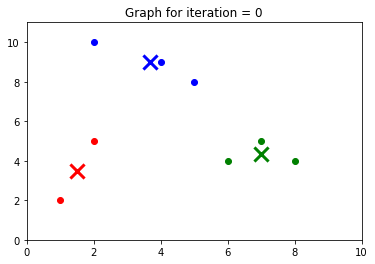

[[array([2., 5.], dtype=float32), array([1., 2.], dtype=float32)], [array([8., 4.], dtype=float32), array([7., 5.], dtype=float32), array([6., 4.], dtype=float32)], [array([ 2., 10.], dtype=float32), array([5., 8.], dtype=float32), array([4., 9.], dtype=float32)]]
[[1.5       3.5      ]
 [7.        4.3333335]
 [3.6666667 9.       ]]
Stopping
Stopping
Stopping


In [ ]:

i = 0
total_iter_needed = 0;
# Run K-means algorithm
for i in range(1,5):
  clusters, centroids = k_means(df, k=3, num_iterations=i)
  if(np.array_equal(old_cluster, centroids)):
    print("Stopping")
    total_iter_needed = i
    i = 100
  else:
    old_cluster = centroids
    colors = ['r', 'g', 'b']
    print("\n\n")
    plt.title(f'Graph for iteration = {i - 1}')   
    for j, cluster in enumerate(clusters):
        for x in cluster:
            plt.scatter(x[0], x[1], c=colors[j])
        plt.scatter(centroids[j][0], centroids[j][1], marker='x', s=200, linewidths=3, c=colors[j])

    plt.xlim(0, 10)
    plt.ylim(0,11)
    
    plt.show()
    print(clusters)
    print(centroids)



**Q4**:
  Therfore the total number of iterations needed is 1, the resulting graphs can be seen above.

     sbp  tobacco  chd
300  138     0.00    0
301  138     2.27    1
302  170     0.00    0
303  128     0.00    1
304  136     1.20    0
..   ...      ...  ...
457  214     0.40    0
458  182     4.20    1
459  108     3.00    0
460  118     5.40    0
461  132     0.00    1

[162 rows x 3 columns]





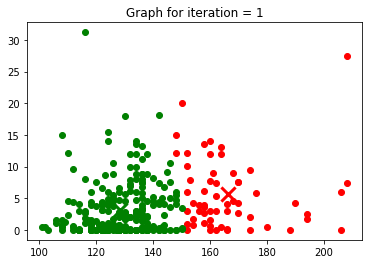

[[166.20338     5.5989833]
 [128.36514     3.1824067]]





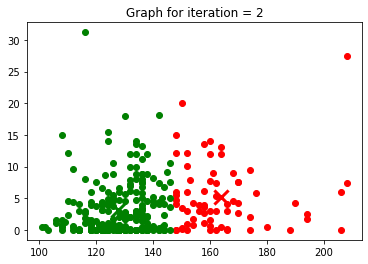

[[163.88235     5.215588 ]
 [127.57758     3.2010345]]





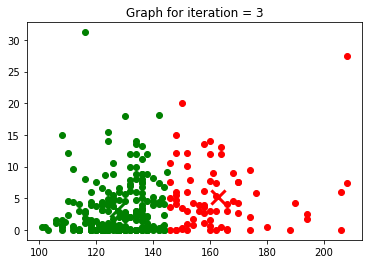

[[162.65753     5.2238355]
 [127.17181     3.1540089]]





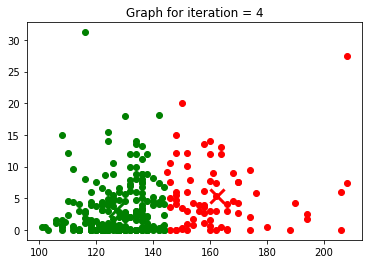

[[162.41891     5.276216 ]
 [127.09292     3.1276991]]
Stopping


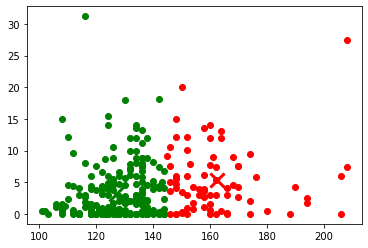

[[162.41891     5.276216 ]
 [127.09292     3.1276991]]


In [ ]:
chunk = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv', chunksize=300)

dfs = next(chunk)
dfs2 = next(chunk) #Grabs the remaning 
data = dfs[['sbp', 'tobacco']]
perdicted = dfs2[['sbp', 'tobacco']]
comparer = dfs2[['sbp', 'tobacco', 'chd']]
print(comparer)


data = data.to_numpy()
comparer = comparer.to_numpy()
perdicted = perdicted.to_numpy()
# print(data)
def initialize_centroids_set2():
    arr = np.array(([[160.0, 12.0], [138, 5]]),dtype=np.float32)
    return arr

def k_means_DataSet2(data_set, k, num_iterations):
    centroids = initialize_centroids_set2()
    for i in range(num_iterations):
        # Assign each data point to the closest centroid
        clusters = [[] for _ in range(k)]
        for x in data_set:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clusters[closest_centroid_index].append(x)

        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(clusters[j], axis=0)

    return clusters, centroids

i = 1
while(i != -1 and i < 8):
  clusters, centroids_2 = k_means_DataSet2(data, k=2, num_iterations=i)
  if(np.array_equal(old_cluster, centroids_2)):
    print("Stopping")
    total_iter_needed = i
    i = -1
  else:
    i+=1
    old_cluster = centroids_2
    colors = ['r', 'g']
    print("\n\n")
    plt.title(f'Graph for iteration = {i - 1}')   
  for j, cluster in enumerate(clusters):
      for x in cluster:
          plt.scatter(x[0], x[1], c=colors[j])
      plt.scatter(centroids_2[j][0], centroids_2[j][1], marker='x', s=200, linewidths=3, c=colors[j])

  
  plt.show()
  print(centroids_2)

In [ ]:
true = 0
false = 0
wrong = 0
for i in comparer:
  opt1 = euclidean_distance(i[:1], centroids_2[0])
  opt2 = euclidean_distance(i[:1], centroids_2[1])
  if(opt1 < opt2 and i[2] == 1):
    true += 1
  elif(opt2 < opt1 and i[2] == 0):
    false += 1
  else:
    wrong += 1
  
print(f"True Positive {true}")
print(f"True Negative {false}")
print(f"False positive False Negative {wrong}")

accuracy = (true + false)/(true + false + wrong)

print(f"The accuract is: {accuracy}")

True Positive 35
True Negative 65
False positive False Negative 62
The accuract is: 0.6172839506172839


**Q8 perdicted graph**

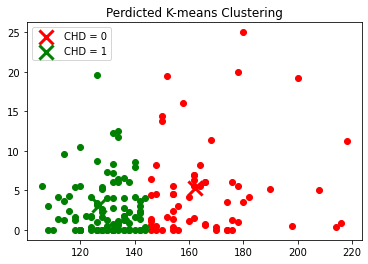

In [ ]:
def initialize_centroids_set3():
  #initalize centroid to ones we solved above
    return centroids_2

def k_means_DataSet2(data_set, k, num_iterations):
    centroids = initialize_centroids_set3()
    for i in range(num_iterations):
        # Assign each data point to the closest centroid
        clusters = [[] for _ in range(k)]
        for x in data_set:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clusters[closest_centroid_index].append(x)

        # Update the centroids
        # for j in range(k):
        #     centroids[j] = np.mean(clusters[j], axis=0)

    return clusters, centroids


clusters, centroids_2 = k_means_DataSet2(perdicted, k=2, num_iterations=1)
labels = ["CHD = 0", "CHD = 1"]
plt.title(f'Perdicted K-means Clustering')   
for j, cluster in enumerate(clusters):
    for x in cluster:
        plt.scatter(x[0], x[1], c=colors[j])
    plt.scatter(centroids_2[j][0], centroids_2[j][1], marker='x', s=200, linewidths=3, c=colors[j], label=labels[j])

plt.legend(loc='upper left')
plt.show()

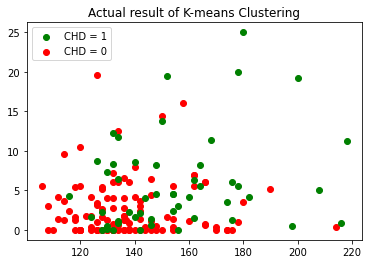

In [ ]:
tmp = dfs2[['sbp', 'tobacco', 'chd']]
chd_1 = (tmp[(tmp['chd']==1)])
chd_2 = (tmp[(tmp['chd']==0)])
#Actual 0 and ones
chd_1 = chd_1[['sbp', 'tobacco']].to_numpy()
chd_2 = chd_2[['sbp', 'tobacco']].to_numpy()



for i in chd_2[1:]:
  plt.scatter(i[0], i[1], c='r')
for i in chd_1[1:]:
  plt.scatter(i[0], i[1], c='g')

plt.scatter(chd_1[0][0], chd_1[0][1], c='g', label="CHD = 1")
plt.scatter(chd_2[0][0], chd_2[0][1], c='r', label="CHD = 0")
plt.title(f'Actual result of K-means Clustering')  
plt.legend(loc='upper left')
plt.show()

**Part B**

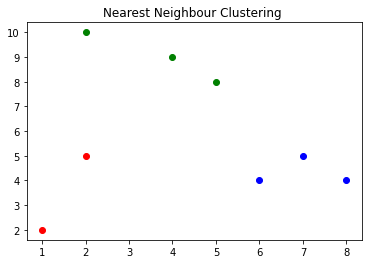

[[1, 6], [0, 3, 7], [2, 4, 5]]
[2 5]
[1 2]
[ 2 10]
[5 8]
[4 9]
[8 4]
[7 5]
[6 4]


In [ ]:
def nearest_neighbor_NN(ref_pt, points, min_dist):
    nearest_pt = -1
    for i, p in enumerate(points):
        if not np.array_equal(p, ref_pt):
            distance = np.sqrt(np.sum((ref_pt - p)**2)) 
            if (distance < min_dist):
                nearest_pt = i
    return nearest_pt

def clustering(X, thresh):
    clusters = [set([i]) for i in range(len(X))]
    for i, p in enumerate(X):
        nearest_index = nearest_neighbor_NN(p, X, thresh)
        if nearest_index != -1:
            if euclidean_distance(p, X[nearest_index]) < thresh:
                cluster1 = next((cluster for cluster in clusters if i in cluster))
                cluster2 = next((cluster for cluster in clusters if nearest_index in cluster))
                if cluster1 != cluster2:
                    clusters.remove(cluster2)
                    cluster1 |= cluster2
            else:
                clusters.append(set([i]))

    # Create a color map with a unique color for each cluster
    clusters = [list(cluster) for cluster in clusters]
    #colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(clusters)))
    col = ['r', 'g', 'b']
    # Plot each point with its corresponding color
    for i, cluster in enumerate(clusters):
      plt.scatter(X[cluster, 0], X[cluster, 1], color=col[i])

    plt.title(f'Nearest Neighbour Clustering ') 
    plt.show()
    return clusters

X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
# nearestNeighbor(dataset,4)
l = 0;
clusters = clustering(X,4)
clus_ans = np.array([])
print(clusters)
for i in clusters:
  l += 1
  for j in i:
    print(X[j])


**Part B data set 2**

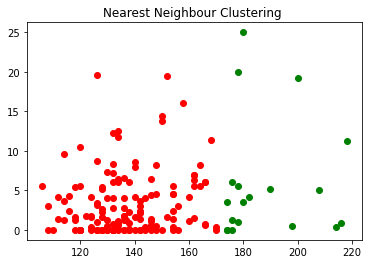

0.7222222222222222


In [ ]:
chunk = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv', chunksize=300)

dfs = next(chunk)
dfs2 = next(chunk) #Grabs the remaning 
data = dfs[['sbp', 'tobacco']]
perdicted = dfs2[['sbp', 'tobacco']].to_numpy()
comparer = dfs2[['sbp', 'tobacco', 'chd']].to_numpy()



#X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
# nearestNeighbor(dataset,4)

clusters = clustering(perdicted,40)

#print(comparer)

tp = 0
tn = 0
wr = 0
l = 0;
for i in clusters:
  for j in i:
    if(comparer[j][2] == 1 and  l == 1):
      tp += 1
    elif(comparer[j][2] == 0 and l == 0):
      tn += 1
    else:
      wr += 1
  l += 1
# print(tp)
# print(tn)
# print(wr)
accuracy = (tp + tn)/(tp + tn + wr)
print(accuracy)

**Part C**

Noise clusters: [0]
Noise clusters: [1]
Noise clusters: [6]


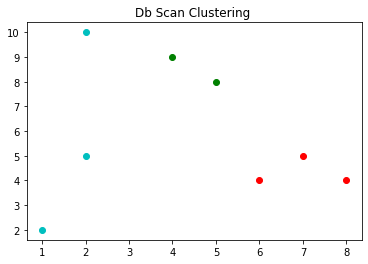

[[2, 4, 5], [3, 7]]


Cluster n
[8 4]
[7 5]
[6 4]
Cluster n
[5 8]
[4 9]


In [ ]:
def DB_Scan(ref_pt, points, eps):
    nearest_pt = -1
    for i, p in enumerate(points):
        if not np.array_equal(p, ref_pt):
            distance = np.sqrt(np.sum((ref_pt - p)**2)) 
            if distance < eps:
                nearest_pt = i
    return nearest_pt



def clustering_DB(X, eps, min_pts):
    clusters = [set([i]) for i in range(len(X))]
    for i, p in enumerate(X):
        nearest_index = DB_Scan(p, X, eps)
        if nearest_index != -1:
            if euclidean_distance(p, X[nearest_index]) < eps:
                cluster1 = next((cluster for cluster in clusters if i in cluster))
                cluster2 = next((cluster for cluster in clusters if nearest_index in cluster))
                if cluster1 != cluster2:
                    clusters.remove(cluster2)
                    cluster1 |= cluster2
            else:
                clusters.append(set([i]))

    # Create a color map with a unique color for each cluster
    clusters = [list(cluster) for cluster in clusters]
    colors = ['r', 'g', 'b']
   
    noise = []
    i = 0
    while(i < len(clusters)):
      if(len(clusters[i]) < min_pts):
        print(f"Noise clusters: {clusters[i]}")
        noise.append(clusters[i])
        clusters.remove(clusters[i])
      else:
        i += 1


    for i, cluster in enumerate(clusters):
      plt.scatter(X[cluster, 0], X[cluster, 1], color=colors[i])

    for i, noise in enumerate(noise):
      plt.scatter(X[noise, 0], X[noise, 1], color='c')

    plt.title(f'Db Scan Clustering ') 
    plt.show()

    return clusters, noise

X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
# nearestNeighbor(dataset,4)
l = 0;
clusters, noise = clustering_DB(X,2, 2)
clus_ans = np.array([])
print(clusters)
print("\n")
for i in clusters:
  l += 1
  print("Cluster n")
  for j in i:
    print(X[j])

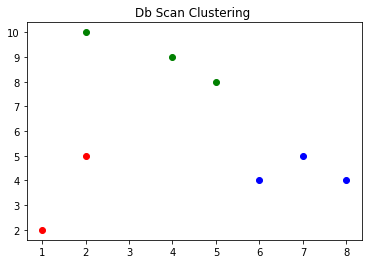

[[1, 6], [0, 3, 7], [2, 4, 5]]


Cluster n
[2 5]
[1 2]
Cluster n
[ 2 10]
[5 8]
[4 9]
Cluster n
[8 4]
[7 5]
[6 4]


In [ ]:

X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
# nearestNeighbor(dataset,4)
l = 0;
clusters, noise = clustering_DB(X,3.17, 2)
clus_ans = np.array([])
print(clusters)
print("\n")
for i in clusters:
  l += 1
  print("Cluster n")
  for j in i:
    print(X[j])

Noise clusters: [113, 97, 103, 107, 157]


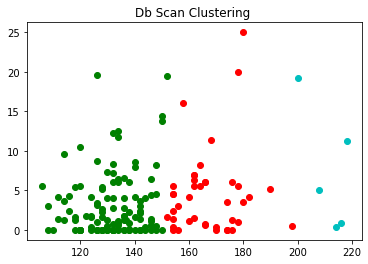

[[2, 10, 12, 13, 142, 15, 14, 18, 20, 22, 152, 25, 156, 30, 158, 35, 42, 45, 46, 49, 52, 59, 63, 64, 79, 85, 89, 91, 92, 93, 96, 102, 104, 106, 110, 111, 112, 116, 117, 121, 123], [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 16, 17, 19, 21, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 90, 94, 95, 98, 99, 100, 101, 105, 108, 109, 114, 115, 118, 119, 120, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 159, 160, 161]]
0.6878980891719745


In [ ]:
chunk = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv', chunksize=300)

dfs = next(chunk)
dfs2 = next(chunk) #Grabs the remaning 
data = dfs[['sbp', 'tobacco']]
perdicted = dfs2[['sbp', 'tobacco']].to_numpy()
comparer = dfs2[['sbp', 'tobacco', 'chd']].to_numpy()



#X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
# nearestNeighbor(dataset,4)

clusters, noise = clustering_DB(perdicted,20, 10)
print(clusters)

tp = 0
tn = 0
fp = 0
fn = 0
l = 0;
for i in clusters:
  for j in i:
    if(comparer[j][2] == 1 and l == 0):
      tp += 1
    elif(comparer[j][2] == 0 and l == 1):
      tn += 1
    elif(comparer[j][2] == 0 and l == 0):
      fp += 1
    else:
      fn += 1
  l += 1
# print(tp)
# print(tn)
# print(wr)
#Assumption: Assuming that all noise points are false negatives 
accuracy = (tp + tn)/(tp + tn + fn + fp)
print(accuracy)

**Accuracy and comparision**

The accuracy for the K-N means algorithm is 62%, for the nearest neighbor algorithm with a threshold of 40, the accuracy is 72%. Lastly, the DB scan algorithm has an accuracy of 69% when DB scan has an epsilon value of 20 and a min number of 10 points per cluster. 

This data was extrapolated by running the previous algorithms above. From this data, we can surmise that the most accurate algorithm is the nearest neighbor algorithm (NN). However, if we change the epsilon value to be 40 then the accuracy of DB scan and nearest neighbor would be the same. Another advantage of nearest neighbor and DB scan is that it only requires one iteration to complete, you do not need to train the data set.

Lastly, if we wanted to make data more accurate we could also take advantage of the noise clusters in the DB scan. This algorithm allows us to remove data points that are outliers, this means that the points will neither be truly positive, negative nor false positive or negative. For this scenario, it is best to use the nearest neighbor algorithm. However, for different scenarios, different algorithms are preferred. 


**Part D**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

chunk = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv', chunksize=300)

dfs = next(chunk)
dfs2 = next(chunk) #Grabs the remaning 
data = dfs[['sbp', 'tobacco']]
perdicted = dfs2[['sbp', 'tobacco']].to_numpy()
# comparer = dfs2[['sbp', 'tobacco', 'chd']].to_numpy()

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data)
kmeans.labels_

kmeans.predict(data)

print("Sklearn Clusters:  ",kmeans.cluster_centers_)

Sklearn Clusters:   [[126.55251142   3.16351598]
 [160.82716049   4.9937037 ]]


**Nearest Neighbour**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=5, min_samples=10).fit(perdicted)
print("sklearn Values",dbscan.labels_)
print(len(dbscan.labels_))
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

x = 0
for i in dbscan.labels_:
  if(i == 0): 
    x += 1

print(x)
print(f"Accuracy {x/162}")
# print("Core samples:", labels)

sklearn Values [ 0  0 -1  0  0  0 -1  0  0  0 -1 -1  1 -1 -1  0  0  0 -1  0  0  0  1  0
  0  0  0  0 -1  0  0  0  0 -1  0  1  0  0  0  0  0  0  1  0  0 -1  0  0
  0  1 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1  0  0 -1 -1  0  0
  1 -1  0  0  0  0 -1 -1  0  0 -1 -1  0  0 -1 -1  1 -1  0  0 -1 -1  0  0
  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0]
162
Number of clusters: 2
119
Accuracy 0.7345679012345679


**DB scan**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=4, min_samples=10).fit(perdicted)
print("sklearn Values",dbscan.labels_)
print(len(dbscan.labels_))
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

x = 0
for i in dbscan.labels_:
  if(i == 0): 
    x += 1

print(x)
print(f"Accuracy {x/162}")
# print("Core samples:", labels)

sklearn Values [ 0  0 -1  0  0  0 -1  0  0  0 -1 -1 -1 -1 -1  1  0 -1 -1  0  1  0 -1 -1
  0  1  0  0 -1  0  1  0  0 -1  0 -1  0  0  0  0  0  0 -1  0  0 -1  1  0
  0 -1 -1  0 -1 -1  0  0  0  0  0  1 -1  0  0 -1  1  0  0  0  0  0 -1  0
  0  0  0  0 -1  0  0  1 -1  0  0  0 -1 -1  0  0  0 -1  0  1 -1 -1 -1  0
 -1 -1  0  0  0  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1  0  0 -1 -1  0  0
 -1 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0
  0  0  0  0  0  0  0  0  1  0  0  0 -1 -1 -1 -1  0  0]
162
Number of clusters: 2
96
Accuracy 0.5925925925925926


**Q1: What are the different metrics used to evaluate the performance of different clustering algorithms?**

TThe different metrics we can use to evaluate the performance of different clustering algorithms are recall, precision, and F1_Score, note that precision and recall are inversely proportional.

Precision is a higher mesure of quality than accuracy, higher precision indicates that it more relevant values as opposed to non relevant ones. The equation is simpilifed to the following (TP/(TP + FP)). As seen in the equation the calculation only looks at the positive values that are predicted correctly and incorrectly

Next we have Recall, recall is also a better way to mesure the usefulness of an algorithm. Recall is more concerned with the number of relevant results we return (TP and FN), these are the data sets that we are most interested in. The equation is as follows [(TP) / (TP + FN)]

Lastly, there is F1_Score = [(2*Percesion*recall)/(Percession*recall)]


**Q2: Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?**


2 other methods we could use to measure the performance of our algorithms are recall and precision. Precision would be a more appropriate evaluation of our clustering results. This is because we are less concerned to measure someone with a positive result it is more important that we do not falsely diagnose someone as negative. That is why recall would be a better way to measure our performance. However, performance can be equally valid if we are looking at what clients we want to perform an x-ray on.
